![task2](task2.png)

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

Load the data set and perform the EDA process

In [10]:
df = pd.read_csv('data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


we can see that there is no missiong values. four variables are all continuous variables and one variable is an object

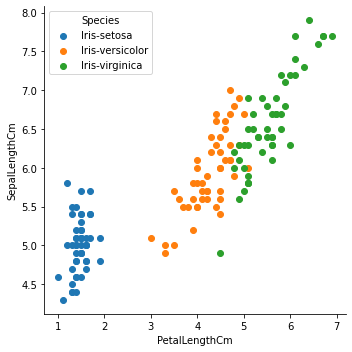

In [12]:
sns.FacetGrid(data=df, legend_out=False, height=5,
              hue='Species').map(plt.scatter, 'PetalLengthCm',
                                 'SepalLengthCm').add_legend()

Choice of the Model : K-Means.

In [13]:
X = df.iloc[:, 1:-1]

In [21]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Check the optimal cluster using elbow method

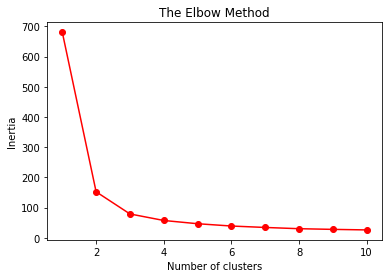

In [15]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    model = KMeans(n_clusters = i, random_state = 0)
    model.fit(X)
    inertia.append(model.inertia_)
plt.plot(range(1, 11), inertia, 'ro-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [16]:
print(f'n_cluster = 2 ---> Inertia = {inertia[1]}')
print(f'n_cluster = 3 ---> Inertia = {inertia[2]}')
print(f'n_cluster = 4 ---> Inertia = {inertia[3]}')

n_cluster = 2 ---> Inertia = 152.36870647733906
n_cluster = 3 ---> Inertia = 78.94084142614601
n_cluster = 4 ---> Inertia = 57.31787321428571


We can see the inetia for 2 and 3 are fair enough.

Let's make the clustering for the number of cluster = 2 and 3 and make conclusion

In [17]:
from sklearn.preprocessing import LabelEncoder
labels = LabelEncoder()
labels.fit_transform(df.Species)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
# For k = 2
kmean2 = KMeans(n_clusters = 2, random_state = 0)
kmean2.fit(X)
labels2 = kmean2.predict(X)
# For k = 3
kmean3 = KMeans(n_clusters = 3, random_state = 0)
kmean3.fit(X)
labels3 = kmean3.predict(X)


In [70]:
dic = {
    0 : 'Iris-setosa',
    1 : 'Iris-versicolor',
    2: 'Iris-virginica'
}
new_df = X
new_df['Class'] = labels3
new_df['Class'] = new_df['Class'].map(dic)

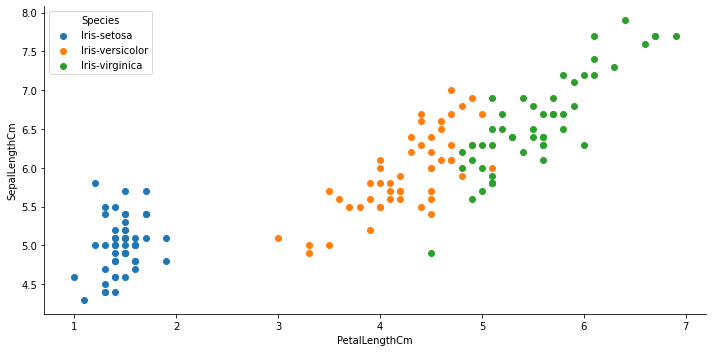

In [78]:
sns.FacetGrid(data=df, legend_out=False, height=5, aspect = 2,
              hue='Species').map(plt.scatter, 'PetalLengthCm',
                                 'SepalLengthCm').add_legend()

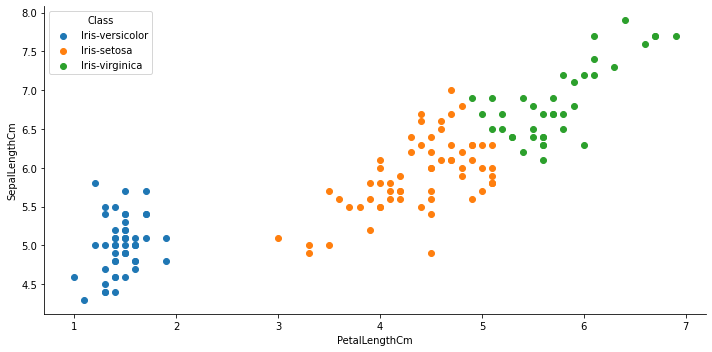

In [77]:
sns.FacetGrid(data=new_df, legend_out=False, height=5, aspect = 2,
              hue='Class').map(plt.scatter, 'PetalLengthCm',
                                 'SepalLengthCm').add_legend()

Creating a cross table

In [67]:
rownames = ['Clusters']
colnames = ['Elements']
cross_tab = pd.crosstab(labels3, labels, rownames=rownames, colnames = colnames)
cross_tab

Elements,LabelEncoder()
Clusters,
0,62
1,50
2,38
